# Tensorboard a visualization tool

In [1]:
%load_ext tensorboard

In [2]:
import tensorflow as tf
import datetime

In [4]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("cifar10", as_supervised = True, with_info = True, batch_size = -1)
dataset_train, dataset_test = dataset["train"], dataset["test"]

print(dataset_train[0].shape, dataset_train[1].shape)
print(dataset_test[0].shape, dataset_test[1].shape)

C:\Users\Dell\Anaconda3\envs\tensorflow\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.cs.toronto.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset cifar10 downloaded and prepared to C:\Users\Dell\tensorflow_datasets\cifar10\1.0.2. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


(?, 32, 32, 3) (?,)
(?, 32, 32, 3) (?,)


In [5]:
# We can take it from keras dataset
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 202s 1us/step


In [7]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


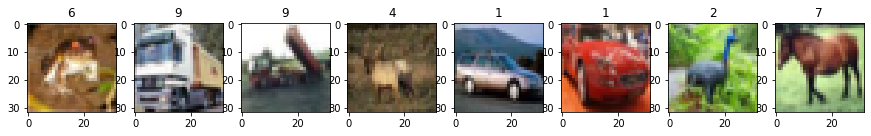

In [8]:
plt.figure(figsize=(15, 4))
for i in range(0, 8):
    plt.subplot(1, 8, i+1)
    plt.imshow(train_images[i])
    plt.title(train_labels[i, 0])

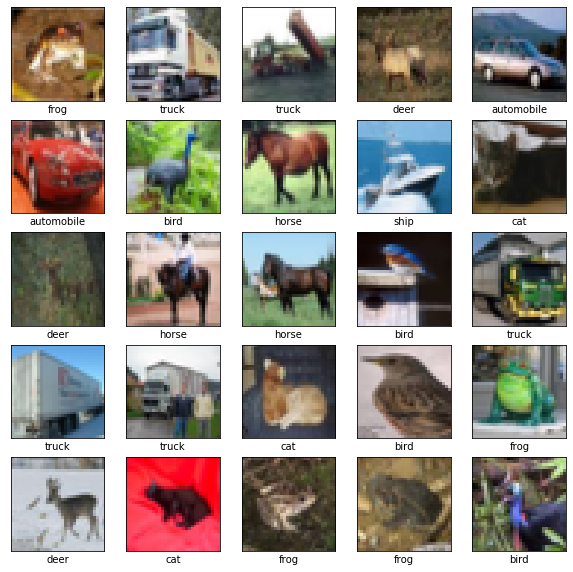

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
    
plt.show()

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [14]:
# Remove previous training log
!rm -rf ./logs/

### Using keras model.fit() with tensorboard

In [50]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
log_dir = os.path.join(
    "logs",
    "fit",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopper = EarlyStopping(monitor='val_acc', patience=10)
tensorboard = TensorBoard(log_dir, histogram_freq=1)

checkpointer = ModelCheckpoint(log_dir+'weights_epoch_{epoch:02d}_val_acc_{val_acc:.2f}.hdf5',
                               monitor='val_acc')

model.fit(train_images, train_labels,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_split=0.1,
          callbacks=[early_stopper,
                     tensorboard,
                     checkpointer])

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 818s 18ms/sample - loss: 0.6916 - acc: 0.7592 - val_loss: 0.8295 - val_acc: 0.7120
Epoch 2/10
45000/45000 [==============================] - 234s 5ms/sample - loss: 0.6563 - acc: 0.7701 - val_loss: 0.8400 - val_acc: 0.7206
Epoch 3/10
45000/45000 [==============================] - 163s 4ms/sample - loss: 0.6311 - acc: 0.7819 - val_loss: 0.8140 - val_acc: 0.7268
Epoch 4/10
45000/45000 [==============================] - 157s 3ms/sample - loss: 0.6053 - acc: 0.7892 - val_loss: 0.8513 - val_acc: 0.7148
Epoch 5/10
45000/45000 [==============================] - 159s 4ms/sample - loss: 0.5812 - acc: 0.7966 - val_loss: 0.8194 - val_acc: 0.7340
Epoch 6/10
45000/45000 [==============================] - 163s 4ms/sample - loss: 0.5540 - acc: 0.8075 - val_loss: 0.8103 - val_acc: 0.7354
Epoch 7/10
45000/45000 [==============================] - 161s 4ms/sample - loss: 0.5322 - acc: 0.8140 - val_l

In [64]:
import os
sorted(os.listdir(log_dir))

['events.out.tfevents.1580497977.FAISAL',
 'events.out.tfevents.1580497993.FAISAL.profile-empty',
 'plugins']

In [80]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 16008), started 0:02:33 ago. (Use '!kill 16008' to kill it.)

***